In [1]:
#Dataset is emotions. Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label 
#indicating the predominant emotion conveyed. The emotions are classified into six categories:
#sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). 

# reading data
import pandas as pd

#create a dataframe from scsv file
data_raw = pd.read_csv("./NLP.csv")
data_raw.head()

,ID,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [2]:
#view columns
data_raw.columns

Index(['ID', 'text', 'label'], dtype='object')

In [3]:
#Preprocessing

#  missing values
data_raw.isna().sum()
#no missing values

#subseting
#keep only rows, where label is 1 (joy), 3 (anger) or 5 (surprise) (assigment requirement, potentionally better acurracy)
subset_df = data_raw[data_raw['label'].isin([1, 3, 5])]
subset_df.head()

,ID,text,label
7,7,i fear that they won t ever feel that deliciou...,1
8,8,im forever taking some time out to have a lie ...,5
10,10,i try to be nice though so if you get a bitchy...,1
12,12,i have officially graduated im not feeling as ...,1
13,13,i feel like a jerk because the library student...,3


In [4]:
# limit number of rows to shorten build time
data = subset_df.sample(n=1000)
# metaparameter tuning takes ages at larger samples

<Axes: xlabel='label'>

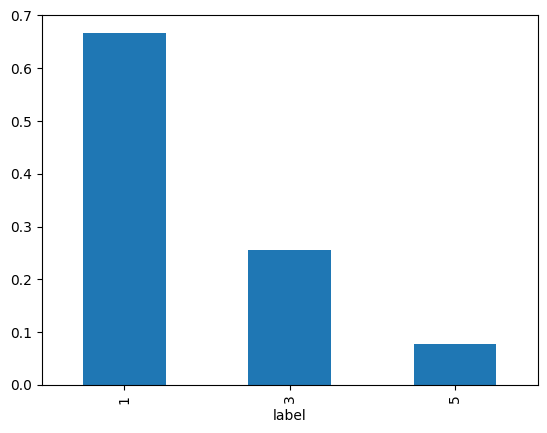

In [5]:
# check target balance
data['label'].value_counts(normalize = True).plot.bar()
#We can see that the values are quite unbalanced, it could be a great idea to try to balance them out

In [6]:
#import library for natural language processing 
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:


# text preprocessing
import nltk
nltk.download('all',quiet=True)

# create a list text (all the texts from the data dataframe)
text = list(data['text'])

# import libs for preprocessing 
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [8]:
#initialize lemmatizer for text preprocessing
lemmatizer = WordNetLemmatizer()
# Initialize an empty list to store preprocessed text
corpus = []

# Iterate through each text in text column
for i in range(len(text)):
    # Remove non-alphabetic characters
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text[i])
    #ex: i am praying that god helps her find peace with her situation and that she does not feel tortured by her feelings
    
    # Convert text to lowercase
    cleaned_text = cleaned_text.lower()
    #ex: i am praying that god helps her find peace with her situation and that she does not feel tortured by her feelings
    
    # Tokenize the text
    tokenized_text = cleaned_text.split()
    #ex: ['i', 'am', 'praying', 'that', 'god', 'helps', 'her', 'find', 'peace', 'with', 'her', 'situation', 'and', 'that', 'she', 'does', 'not', 'feel', 'tortured', 'by', 'her', 'feelings']
    
    # Remove stopwords (like "and", "the"...)
    filtered_text = [word for word in tokenized_text if word not in stopwords.words('english')]
    #ex:['praying', 'god', 'helps', 'find', 'peace', 'situation', 'feel', 'tortured', 'feelings']
    
    # Lemmatize the words (lemmatization - using a original form of a word -ex. from "greenish" to "green")
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    #ex: ['praying', 'god', 'help', 'find', 'peace', 'situation', 'feel', 'tortured', 'feeling']
    
    # Join the words back into a string
    preprocessed_text = ' '.join(lemmatized_text)
    #praying god help find peace situation feel tortured feeling
    
    # Append the preprocessed text to the corpus list
    corpus.append(preprocessed_text)

# Assign the preprocessed corpus back to data['text']
data['text'] = corpus

# Display the first few rows of the DataFrame
data.head()

,ID,text,label
146836,146836,think gone lot feeling past day part rich moth...,1
98948,98948,must tap emotion show cruel yet name vengeance...,1
259564,259564,seen chungking express yet feel like director ...,1
328861,328861,feeling generous decided pull name rafflecopte...,1
100664,100664,could reach part feel like dont time need esta...,1


In [9]:
# Create Feature and Label sets

text_set = data['text']
label_set = data['label']

# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

#crete text and label train and test sets
text_train, text_test, label_train, label_test = train_test_split(text_set, label_set, test_size=0.33, random_state=123)

print('Training Data :', text_train.shape)
print('Testing Data : ', text_test.shape)

Training Data : (670,)
Testing Data :  (330,)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer - converts the text inputs to number representation
tfidf_vectorizer = TfidfVectorizer()

text_train_cv = tfidf_vectorizer.fit_transform(text_train)

text_train_cv.shape
# print out example row of numeric representation of text
print(text_train_cv.getrow(0))


  (0, 1017)	0.46029552829251025
  (0, 722)	0.1731566561193223
  (0, 900)	0.48813672761964516
  (0, 1649)	0.5639546707696875
  (0, 2111)	0.4492465509509578


In [11]:
# model building
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression
#set max_iter to 200, as default value 100 is not sufficient
lr = LogisticRegression(max_iter=200)
#fit the train values to the model
lr.fit(text_train_cv, label_train)

LogisticRegression(max_iter=200)

In [12]:
#Train model using random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the training data to the model
rf_classifier.fit(text_train_cv, label_train)

RandomForestClassifier()

In [13]:
#save model so it doesn't have to be generated on kernel reset
from joblib import dump, load
dump(lr, './lr_model.joblib') 
dump(rf_classifier, './rf_model.joblib') 


['./rf_model.joblib']

In [14]:
lr = load('./lr_model.joblib') 
rf_classifier = load('./rf_model.joblib') 

In [15]:
# transform text_test using CV for evaluation
text_test_cv = tfidf_vectorizer.transform(text_test)

# generate predictions for regression
predictions_lr = lr.predict(text_test_cv)

# generate predictions for random forest
predictions_rf = rf_classifier.predict(text_test_cv)


predictions_lr
# joy (1), anger (3), surprise (5).

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
# confusion matrix for regression

import pandas as pd

from sklearn import metrics


df = pd.DataFrame(metrics.confusion_matrix(label_test,predictions_lr))
# joy (0), anger (1), surprise (2).
df

,0,1,2
0,212,1,0
1,68,17,0
2,32,0,0


In [17]:
# confusion matrix for random forest

import pandas as pd

from sklearn import metrics

df = pd.DataFrame(metrics.confusion_matrix(label_test,predictions_rf))
# joy (0), anger (1), surprise (2).
df

,0,1,2
0,212,0,1
1,47,37,1
2,22,0,10


In [18]:
#accuracy of logistic regression

from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy_lr = accuracy_score(label_test, predictions_lr)

print("Accuracy using logistic regression:", accuracy_lr)

Accuracy using logistic regression: 0.693939393939394


In [19]:
#accuracy of random forest
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy_rf = accuracy_score(label_test, predictions_rf)

print("Accuracy using random forest:", accuracy_rf)

Accuracy using random forest: 0.7848484848484848


In [20]:
# meta parameter tuning for logistic regression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

import warnings
warnings.filterwarnings('ignore')

# Define the hyperparameter distributions for Logistic Regression
lr_param_dist = {
    'C': uniform(0.1,10),
    'max_iter': randint(400, 500),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform randomized search for Logistic Regression
lr_random_search = RandomizedSearchCV(LogisticRegression(), lr_param_dist, n_iter=100, cv=5, random_state=42)
lr_random_search.fit(text_train_cv, label_train)

print(lr_random_search.best_params_)


{'C': 8.932802589188682, 'max_iter': 491, 'penalty': 'l1', 'solver': 'liblinear'}


In [21]:

# meta parameter tuning for random forest
# Define the hyperparameter distributions for Random Forest
rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt']
}

# Perform randomized search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_dist, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(text_train_cv, label_train)


print(rf_random_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 319}


In [22]:
#accuracy of logistic regression after hyperparameter tuning

from sklearn.metrics import accuracy_score
predictions_lr_hyper = lr_random_search.predict(text_test_cv)
# Calculate accuracy
accuracy_lr = accuracy_score(label_test, predictions_lr_hyper)

print("Accuracy using logistic regression after metaparameter tuning:", accuracy_lr)

#accuracy of random tree after hyperparameter tuning

from sklearn.metrics import accuracy_score
predictions_rf_hyper = rf_random_search.predict(text_test_cv)
# Calculate accuracy
accuracy_rf_hyper = accuracy_score(label_test, predictions_rf_hyper)

print("Accuracy using random forest after metaparameter tuning:", accuracy_rf_hyper)

Accuracy using logistic regression after metaparameter tuning: 0.9484848484848485
Accuracy using random forest after metaparameter tuning: 0.7515151515151515


In [32]:
#you can test the classification on your own input - would work better if you use more rows, currently
#the model is trained on only 1000 rows to keep the build time low.
input = "I'm a selfish person" #should evalute to 3
input_joy = "I love chocolate"
#"I love chocolate" should evaluate to 1

sparse_matrix = tfidf_vectorizer.transform([input])
pred1 = lr_random_search.predict(sparse_matrix)

sparse_matrix = tfidf_vectorizer.transform([input_joy])
pred2 = lr_random_search.predict(sparse_matrix)

print("I'm a selfish person", pred1)
print("I love chocolate", pred2)
# joy (1), anger (3), surprise (5).

I'm a selfish person [3]
I love chocolate [1]
